# Prosper Loan Data Exploration
## by Gloria V

## Preliminary Wrangling

This document explores a Prosper dataset which contains attributes of about 113,000 loans.


In [143]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set(rc={'figure.figsize':(11.7,8.27)})

Loaded the file into a dataframe and then took a glance using the functions head, shape and info.

In [144]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [145]:
df.shape

(113937, 81)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The dataset has 113,937 loans with 81 features. A good amount of the attributes are numeric as it would be expected for a financial dataset. There are also boolean attributes as well as some defined as objects. 

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out the possible correlation between different features and the current Loan Status. Based on the Data Dictionary the the current Loan Status can either be Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the following features might have an effect in the current Loan Status: ProsperRating. Monthly Income. Credit Score. Loan Original Amount.



## Univariate Exploration


### 1. Loan Status

One of the first variables that I wanted to analyze was LoanStatus. I first ran the value_counts and draw a countplot to get an idea of the distribution of the values. 

Based on that I decided to:
- Remove the 5 records with LoanStatus Cancelled. Five records are not representative and would not be required for the rest of the analysis.
- Create another variable to Consolidate the Loan Status into 5 categories: Current, Completed, Chargedoff, Defaulted and Past Due.

In [147]:
# this will help to get order of bars by frequency
type_counts = df['LoanStatus'].value_counts()
type_order = type_counts.index

In [148]:
type_counts

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [149]:
type_order

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

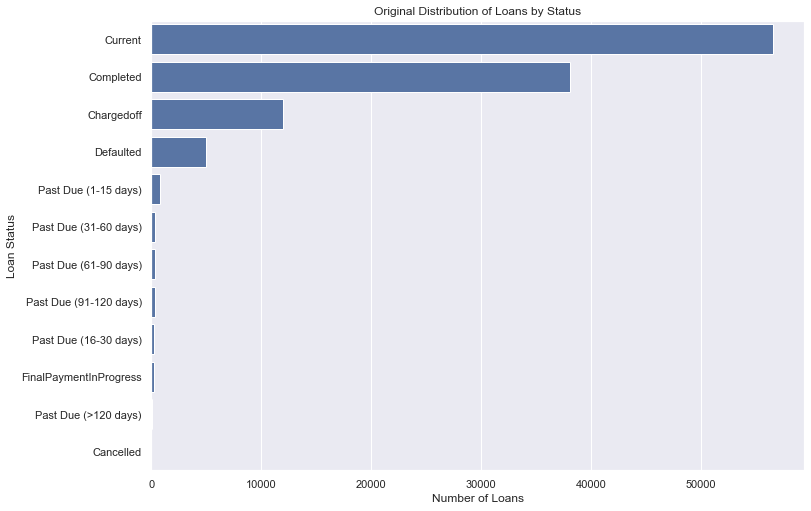

In [150]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = base_color, order = type_order);
plt.title('Original Distribution of Loans by Status')
plt.ylabel('Loan Status')
plt.xlabel('Number of Loans');

This function will consolidate all the Past Due status into the same Category. It will also consolidate the loans with status FinalPaymentInProgress into the Current status.

In [151]:
pastDueList = ['Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)']
exceptions = []
def LoanStatus(loan):
    try:
        if loan.LoanStatus in pastDueList:
            return 'Past Due'
        elif loan.LoanStatus == 'FinalPaymentInProgress':
            return 'Current'
        else:
            return loan.LoanStatus
    except:
        exceptions.append(loan.ListingNumber)

Here I am using the function to create the new variable with consolidated Loan Status.

In [152]:
df['LoanStatusSummary'] = df.apply(LoanStatus, axis = 1)

Here I am saving the indexes of the loans with status Cancelled and the proceeding to drop those records

In [156]:
to_drop = df.query('LoanStatusSummary == "Cancelled"').index.values
df.drop(to_drop, inplace=True)

In preparation to draw the new distribution of Loans by status I set up type_counts and type order.

In [157]:
type_counts = df['LoanStatusSummary'].value_counts()
type_order = type_counts.index

In [158]:
type_counts

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2272
Name: LoanStatusSummary, dtype: int64

In the graphic below we can see the distribution of the Status of Loans. How would you feel is either investor or potential borrower? I kind of not feel reassured with the amount of loans Charged Off, Defaulted and Past Due. 

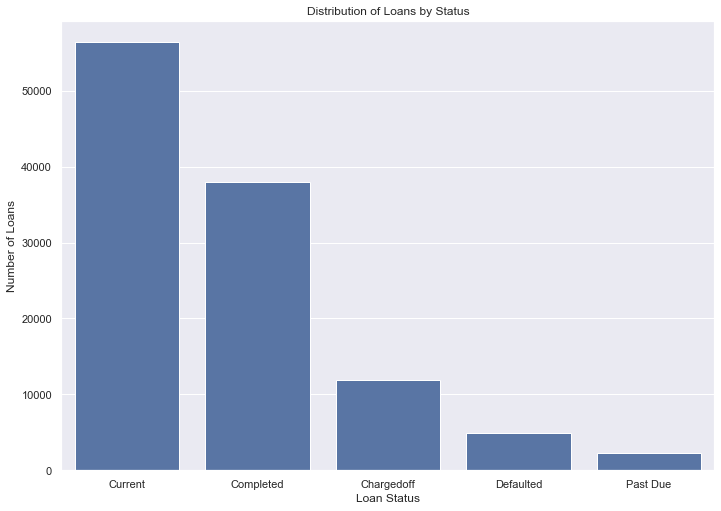

In [232]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatusSummary', color = base_color, order = type_order);
plt.title('Distribution of Loans by Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans');

### 2. Credit Score

The next variable I wanted to analyze was the Credit Score. I first started by running the describe() function and plotting the values. I found out that some loans had the Credit Score set as zero. After doing a quick research I confirmed that No one has a credit score of zero. https://www.discover.com/credit-cards/resources/credit-score-of-zero/

The number of records with Credit Score zero is statistically very low compared to the number of records available. I decided to remove those records considering them outliers.

In [160]:
df.CreditScoreRangeLower.describe()

count    113342.000000
mean        685.570927
std          66.455125
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

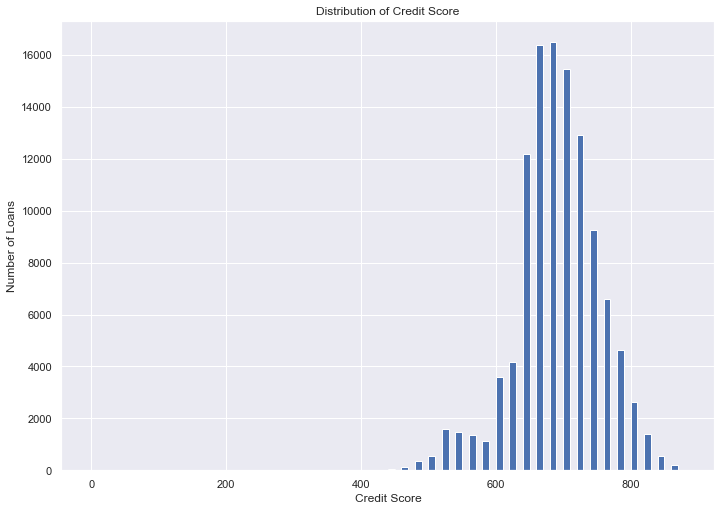

In [168]:
bins = np.arange(0, df['CreditScoreRangeLower'].max()+10, 10)
plt.hist(df['CreditScoreRangeLower'], bins = bins);
plt.title('Distribution of Credit Score')
plt.ylabel('Number of Loans')
plt.xlabel('Credit Score');

In [163]:
df.CreditScoreRangeLower.value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12922
640.0    12198
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1592
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      553
480.0      346
860.0      212
460.0      141
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [161]:
to_drop = df.query('CreditScoreRangeLower == 0').index.values
df.drop(to_drop, inplace=True)

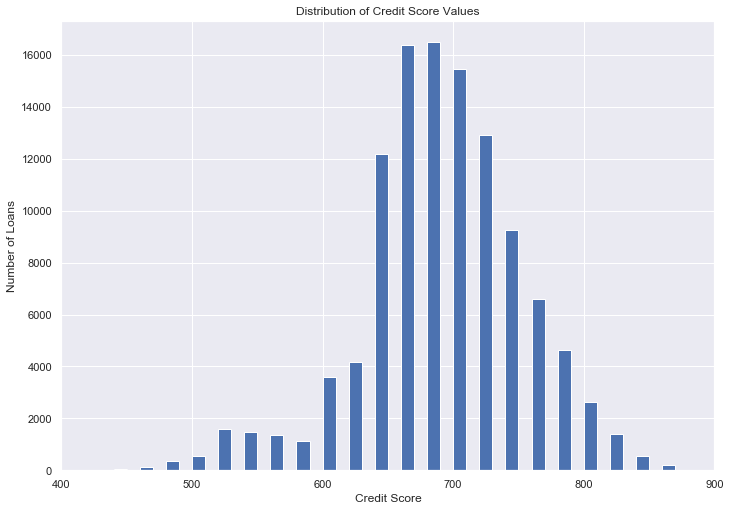

In [170]:
bins = np.arange(0, df['CreditScoreRangeLower'].max()+10, 10)
plt.hist(df['CreditScoreRangeLower'], bins = bins);
plt.xlim(400, 900)
plt.title('Distribution of Credit Score Values')
plt.ylabel('Number of Loans')
plt.xlabel('Credit Score');

Once I saw the distribution of the Credit Score I decided to create a function that will help split the Credit Score into two groups: Below Average Credit Score and Above Average Credit Score. 

I then used it to create the new column called Credit Score Summary

In [171]:
def CreditScoreSummary(loan):
    if loan.CreditScoreRangeLower <= 680:
        return 'Below Average'
    else:
        return 'Above Average'

In [193]:
df['CreditScoreSummary'] = df.apply(CreditScoreSummary, axis = 1)

### 3. Stated Monthly Income

I then proceeded to analyze the variable StatedMonthlyIncome. I immediately noticed that there was something off with some values here after the initial plot and describe were ran. 

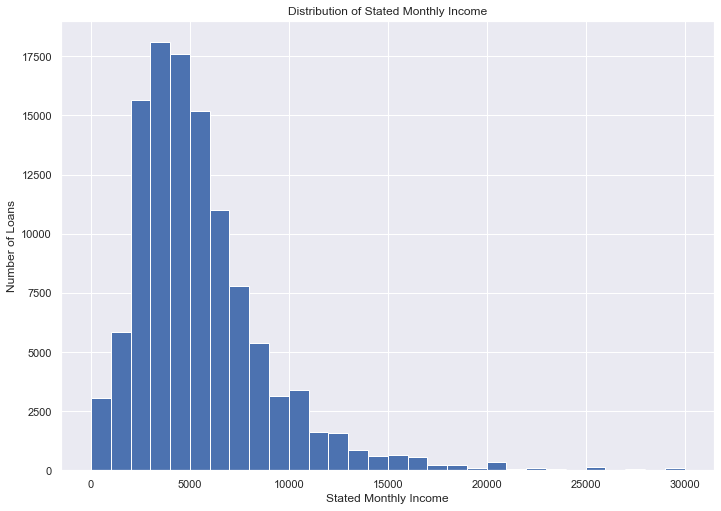

In [188]:
bins = np.arange(0, df['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(df['StatedMonthlyIncome'], bins = bins)
plt.title('Distribution of Stated Monthly Income')
plt.ylabel('Number of Loans')
plt.xlabel('Stated Monthly Income');

In [119]:
df.StatedMonthlyIncome.describe()

count    1.137990e+05
mean     5.611886e+03
std      7.481442e+03
min      0.000000e+00
25%      3.208333e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

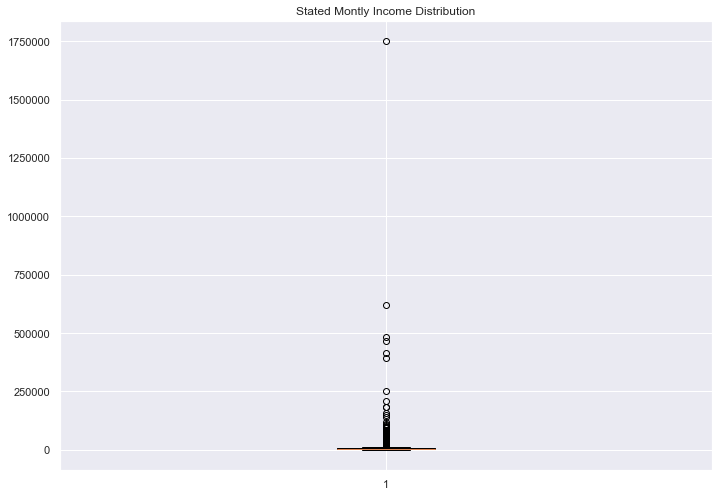

In [176]:
fig1, ax1 = plt.subplots()
ax1.set_title('Stated Montly Income Distribution')
ax1.boxplot(df.StatedMonthlyIncome);

In [180]:
df.query('StatedMonthlyIncome > 30000').ListingKey.count()

326

After seeing this distribution I proceeded to remove loans with Stated Monthly Income greater than 30,000. There are only 326 values out of 113000 values and are considered outliers for the purpose of the analysis.

Even though the new distribution still includes outliers we can now see where the majority of the loans fall into.

In [181]:
to_drop = df.query('StatedMonthlyIncome > 30000').index.values
df.drop(to_drop, inplace=True)

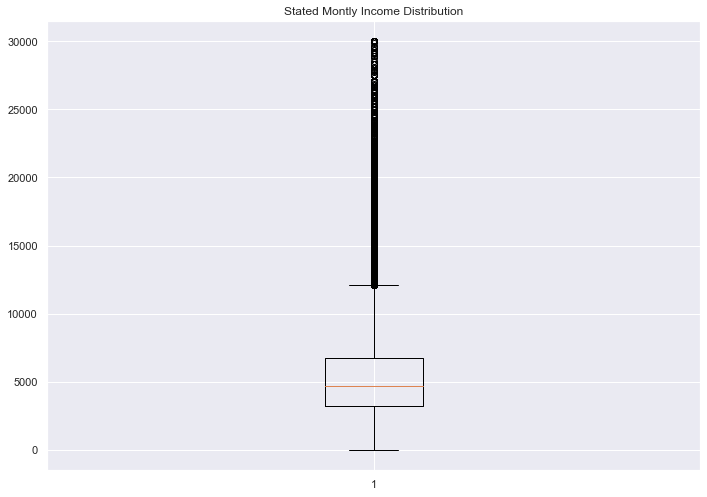

In [182]:
fig1, ax1 = plt.subplots()
ax1.set_title('Stated Montly Income Distribution')
ax1.boxplot(df.StatedMonthlyIncome);

### 4. Loan Original Amount

In the graph below we can see that there are peaks on the multiples of five thousand. I consider that to be realistic because usually we think on multiples of five thousand when we think about loans.

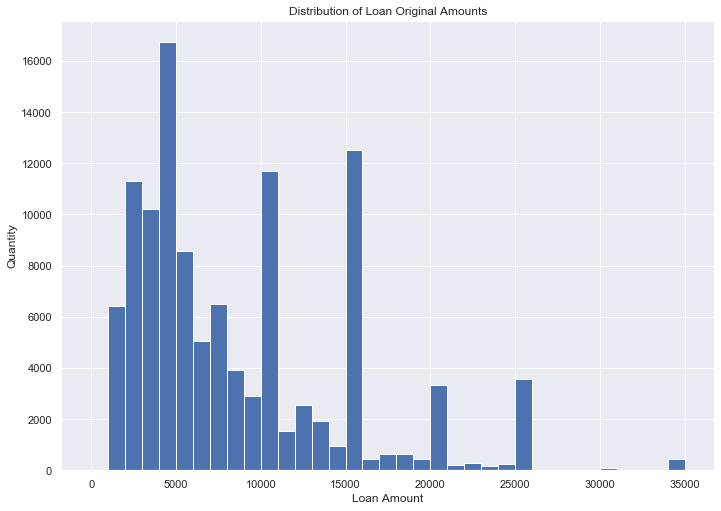

In [190]:
bin_edges = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges);
plt.title('Distribution of Loan Original Amounts')
plt.ylabel('Quantity')
plt.xlabel('Loan Amount');

### 5. Prosper Rating

I then proceeded to analyze the variable ProsperRating. For this I first changes the datatype to a Categorical type to be able to have the categories in order where AA is the best and HR is the worst category.

This almost looks like a normal distribution, where the Average Rating is the most common. I think this makes sense from a real life situation.

In [186]:
level_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_cat)


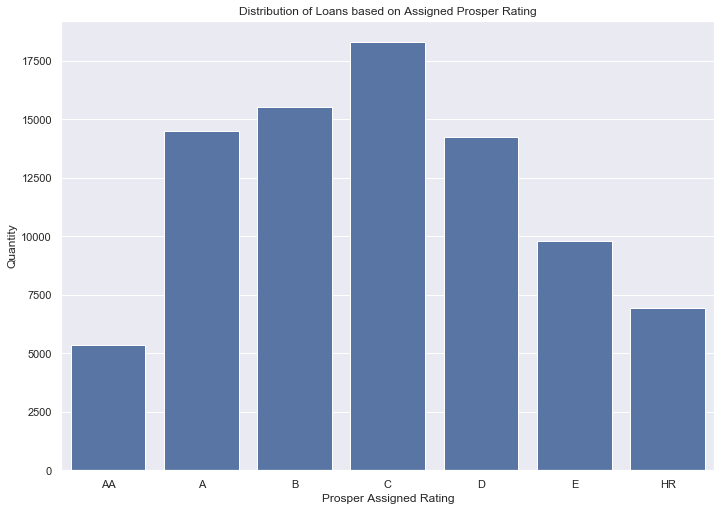

In [191]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Distribution of Loans based on Assigned Prosper Rating')
plt.ylabel('Quantity')
plt.xlabel('Prosper Assigned Rating');

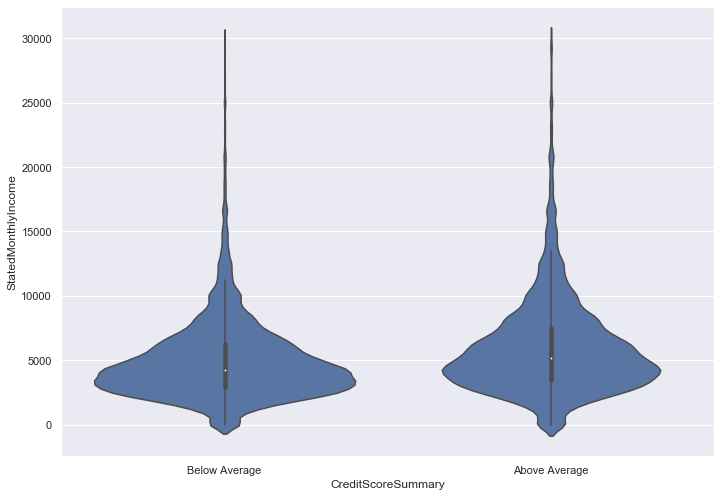

In [140]:
sb.violinplot(data = df, x = 'CreditScoreSummary', y = 'StatedMonthlyIncome', color = base_color);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yes, there were. One of them was on the Original Loan Amount. There are peaks on the multiples of five thousand. SO in the graph I can see that loans are more common for $5k, 10K, 15k. In this case no transformation was required because it is as expected.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, there were. For example the Stated Monthly Income was very skewed. After analyzing further, I decided to remove some of the records that had very high salary considering that the number of records removed were very low compared to the total. 

Another example was with the Credit Score variable. In that case there were some records set as zero. A zero Credit Score is not valid. I proceeded to remove the values because the quantity was very minimal considering the number of records.

## Bivariate Exploration


### 1. Loan Status Summary and Loan Original Amount Relationship

Here I wanted to see the relationship between the Loan Status and the Loan Original Amount. What I can say about this distributions is that even though all of them have their some unique characteristics overall all are very similar.

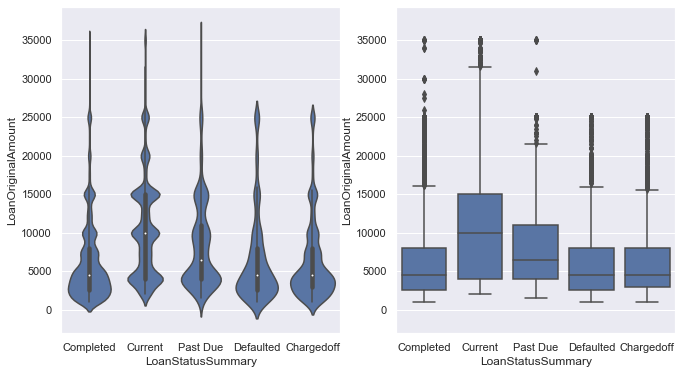

In [235]:
plt.figure(figsize = [11, 6])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'LoanStatusSummary', y = 'LoanOriginalAmount', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'LoanStatusSummary', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


### 2. Loan Status vs. Stated Monthly Income

Here I wanted to see the distribution between the Loan Status and Stated Monthly Income. Based on the plot shown below, I can see that they are kind of homogeneous between each other. There is no outstanding difference between the status a loan is maintained and the reported monthly income.

In [201]:
df.StatedMonthlyIncome.describe()

count    113473.000000
mean       5457.034041
std        3508.675415
min           0.000000
25%        3200.000000
50%        4666.666667
75%        6750.000000
max       30000.000000
Name: StatedMonthlyIncome, dtype: float64

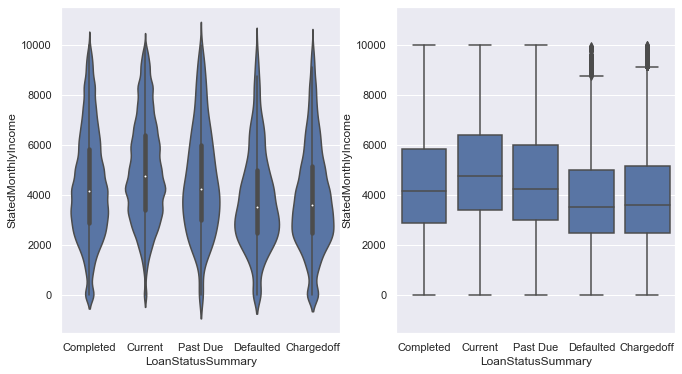

In [236]:
plt.figure(figsize = [11, 6])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df[df['StatedMonthlyIncome'] < 10000], 
                    x = 'LoanStatusSummary', y = 'StatedMonthlyIncome', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df[df['StatedMonthlyIncome'] < 10000], 
           x = 'LoanStatusSummary', y = 'StatedMonthlyIncome', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


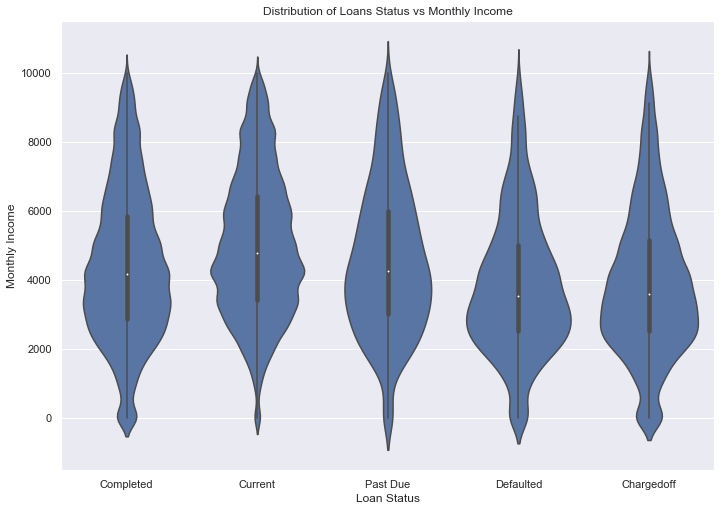

In [243]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df[df['StatedMonthlyIncome'] < 10000], 
                    x = 'LoanStatusSummary', y = 'StatedMonthlyIncome', color = base_color)
plt.title('Distribution of Loans Status vs Monthly Income')
plt.ylabel('Monthly Income')
plt.xlabel('Loan Status');

### 3. Prosper Rating vs. Loan Status

Here I wanted to see the relationship between the Prosper Rating and the Loan Status. As can be seen below, there is acorrelation between the assigned Proper Rating and how the Loan is been kept. Looks like the worst rates have more loans in the Chargedoff, Defaulted and Past Due Status.

AA is the best possible rating and HR is the worst possible rating. The list is shown in descendent order.

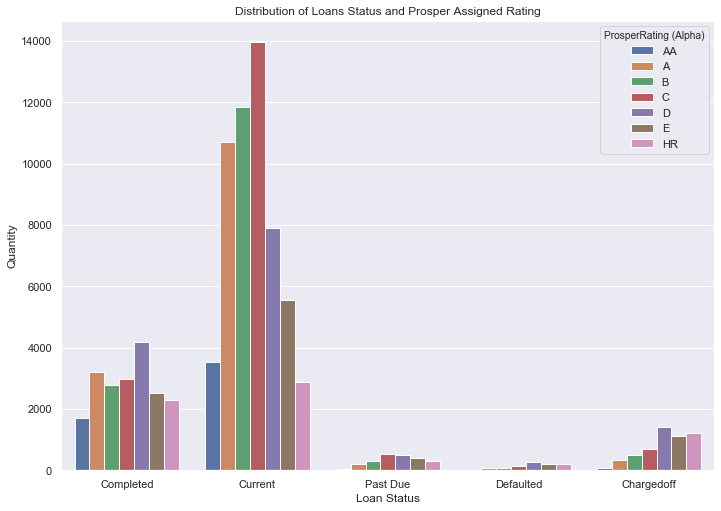

In [237]:
sb.countplot(data = df, x = 'LoanStatusSummary', hue = 'ProsperRating (Alpha)')
plt.title('Distribution of Loans Status and Prosper Assigned Rating')
plt.ylabel('Quantity')
plt.xlabel('Loan Status');

### 4. Loan Status vs. Credit Score

In this graph we can see that for all Loan Status except Current, the Credit Score Below Average is more prevalent. That ratio is more prevalent on the Charged Off and Defaulted Loans. 

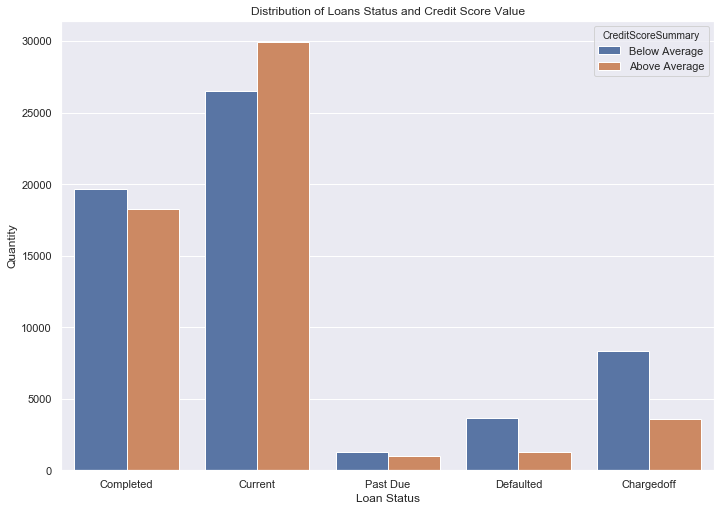

In [197]:
sb.countplot(data = df, x = 'LoanStatusSummary', hue = 'CreditScoreSummary')
plt.title('Distribution of Loans Status and Credit Score Value')
plt.ylabel('Quantity')
plt.xlabel('Loan Status');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Loan Status seems to have a correlation with the Credit Score. We can see that there are more Loans in either Chargedoff or Default for Credit Scores Below Average.
The Loan Status seems to have a correlation with the Assigned Proper Rating. There are a higher ratio of Loans in either Chargedoff or Default for lower Proper Rates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the Stated Monthly Income does not seem to have a strong correlation with the Loan Status. 

## Multivariate Exploration


### 1. Distribution of Credit Score vs. Loan Amount with Loan Status as Shape Encoding

This was the first attempt and even though the graph os overplotted I was able to see that the higher the Credit Score the higher tendency for a higher Loan Amount. This is not a ghaph that I would use as explanatory, but wa helpful from exploratory perspective.

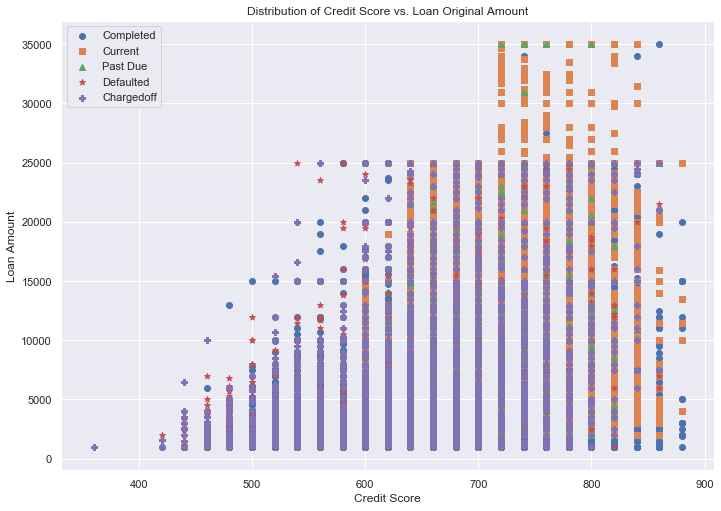

In [238]:
#df.CreditScoreRangeLower
# ['LoanOriginalAmount', 'DebtToIncomeRatio']
cat_markers = [['Completed', 'o'],
               ['Current', 's'],
               ['Past Due', '^'],
               ['Defaulted', '*'],
               ['Chargedoff', 'P'],]

for cat, marker in cat_markers:
    df_cat = df[df['LoanStatusSummary'] == cat]
    plt.scatter(data = df_cat, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', marker = marker)
plt.legend(['Completed','Current', 'Past Due', 'Defaulted', 'Chargedoff'])
plt.title('Distribution of Credit Score vs. Loan Original Amount')
plt.ylabel('Loan Amount')
plt.xlabel('Credit Score');

This is conceptually the same graph as above but applying jitter and transparency to try to uncover any hidden characteristics caused by the Credit Scores being mainly multiples of 10 here. I would not use this graph for explanatory purposes because it wuld be convoluted but it confirmed my thoughts based on the previous graph.

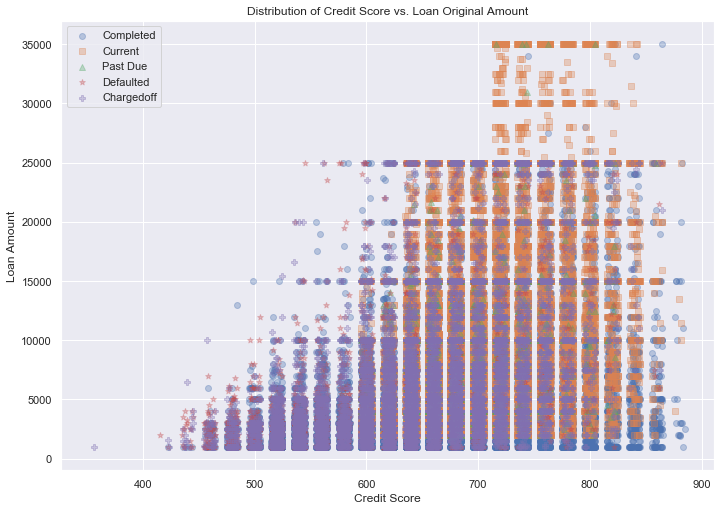

In [239]:
cat_markers = [['Completed', 'o'],
               ['Current', 's'],
               ['Past Due', '^'],
               ['Defaulted', '*'],
               ['Chargedoff', 'P'],]

for cat, marker in cat_markers:
    df_cat = df[df['LoanStatusSummary'] == cat]
    sb.regplot(data = df_cat, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', 
               marker = marker, x_jitter = 5, fit_reg=False,
               scatter_kws = {'alpha' : 1/3})
plt.legend(['Completed','Current', 'Past Due', 'Defaulted', 'Chargedoff'])
plt.title('Distribution of Credit Score vs. Loan Original Amount')
plt.ylabel('Loan Amount')
plt.xlabel('Credit Score');

### 2. Stated Monthly Income vs. Loan Original Amount with Loan Status as Shape Encoding

In the below graph I can see that the Chargedoff Loans are mostly distributed on the lower spectrum of stated monthly income and lower spectrum of loan original amount. This is another of the graphs that I would not use for explanatory purposes, but definitely helped in finding that Chargedoff relationship.

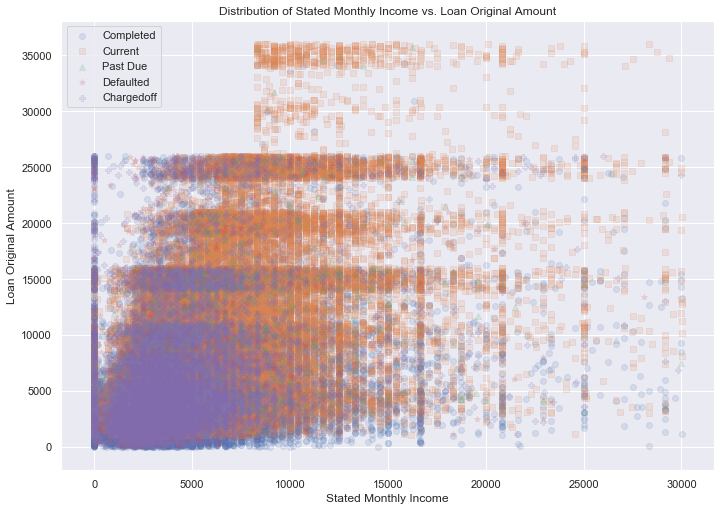

In [240]:

cat_markers = [['Completed', 'o'],
               ['Current', 's'],
               ['Past Due', '^'],
               ['Defaulted', '*'],
               ['Chargedoff', 'P'],]

for cat, marker in cat_markers:
    df_cat = df[df['LoanStatusSummary'] == cat]
    sb.regplot(data = df_cat, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', 
               marker = marker, x_jitter = 5, y_jitter = 1000, fit_reg = False,
               scatter_kws = {'alpha' : 1/7})
plt.legend(['Completed','Current', 'Past Due', 'Defaulted', 'Chargedoff']);
plt.title('Distribution of Stated Monthly Income vs. Loan Original Amount')
plt.ylabel('Loan Original Amount')
plt.xlabel('Stated Monthly Income');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

An interesting finding during this multivariate exercise was that the ChargedOff Loans are for Loans where the Original Loan Amount is lower than average. Also as a confirmation fact, there is a correlation between the Original Loan Amount and the Credit Score. The Higher the Credit Score, the higher the requested Loan Amount tends to be.

### Were there any interesting or surprising interactions between features?

Not exactly in the surprising side, but more of confirmation side. Seems like having a good credit score is tough no matter your level of income. Sure, it helps but seems like financial education and awareness play their part too.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!